<a href="https://colab.research.google.com/github/Abhilashvadukari/2303a51227-AIML-2025/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [7]:
df=pd.read_csv("/content/drive/MyDrive/titanic_test (1).csv")
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
d=df.describe(percentiles=[.5,.75,.9])
d


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
90%,1267.300000,3.000000,50.000000,1.000000,1.300000,79.200000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Plot a bar diagram to check the number of numeric entries
from the bar diagram

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

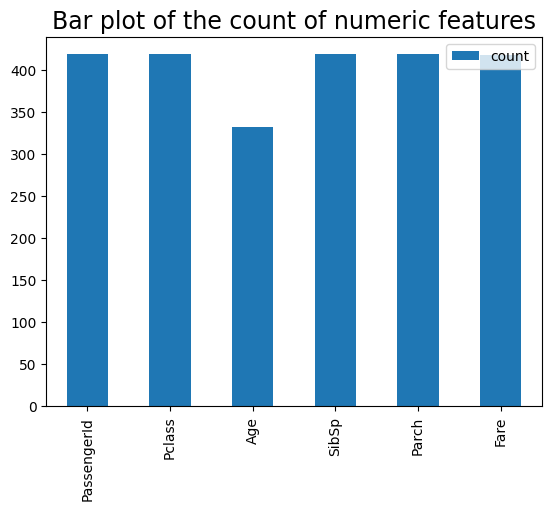

In [12]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

Check the realtive size of survived and not-survied

Is there a pattern for the survivability based on sex?

it looks like more female survived than males!



<Axes: xlabel='survived', ylabel='count'>

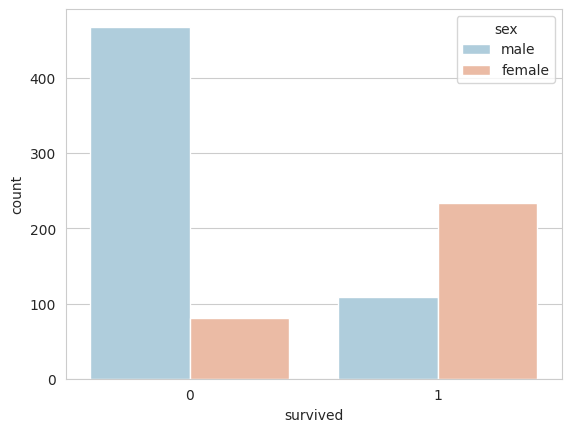

In [16]:
# Ensure that the DataFrame 'df' is correctly defined and contains the 'survived' column.
# If you are working with the 'titanic' dataset, you might need to load it first.

!pip install seaborn
import seaborn as sns

# Load the 'titanic' dataset
df = sns.load_dataset('titanic')

sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

What about any pattern related to passenger class

It looks like dispropor

<Axes: xlabel='survived', ylabel='count'>

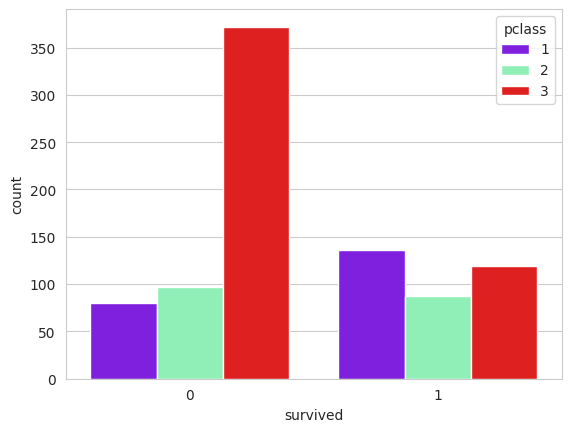

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='pclass',data=df,palette='rainbow')

Following code extracts and plots the fraction of passengers count that that survived by each class

<ipython-input-18-17326deb9faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',data=f_class_survived,palette='rainbow')


Text(0.5, 1.0, 'Fraction of passsengers survied by class')

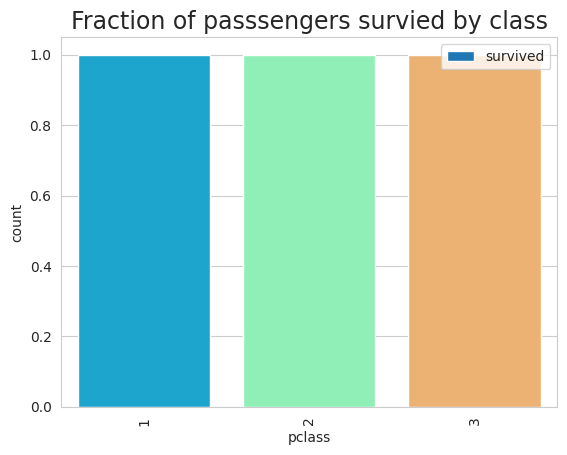

In [18]:
f_class_survived=df.groupby('pclass')['survived'].mean()
f_class_survived=pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='survived')
sns.countplot(x='survived',data=f_class_survived,palette='rainbow')
plt.title("Fraction of passsengers survied by class",fontsize=17)

Text(0.5, 0, 'paasengers class')

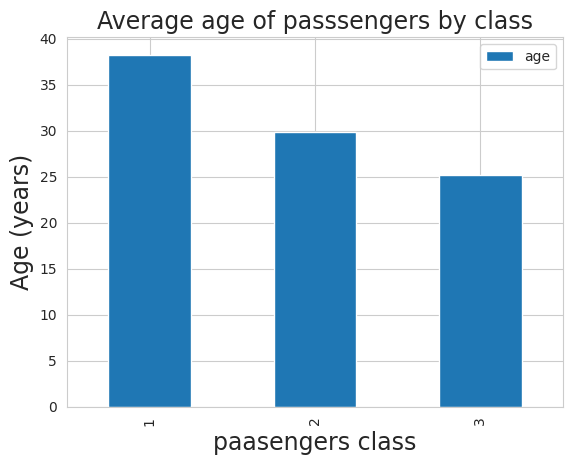

In [19]:
f_class_Age=df.groupby('pclass')['age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)

f_class_Age.plot.bar(y='age')
plt.title("Average age of passsengers by class",fontsize=17)
plt.ylabel("Age (years)",fontsize=17)
plt.xlabel("paasengers class",fontsize=17)

Define a function to impute(fill-up missing values) age Feature

In [20]:
a=list(f_class_Age['age'])
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):

    if pclass == 1:
      return a[0]

    elif pclass == 2:
      return a[1]

    else:
      return a[2]

  else:
    return age


Apply the above-defined function and plot the count of numeric features

<ipython-input-20-01b78ecfe923>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
<ipython-input-20-01b78ecfe923>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


Text(0.5, 1.0, 'Bar plot of the count of numric features')

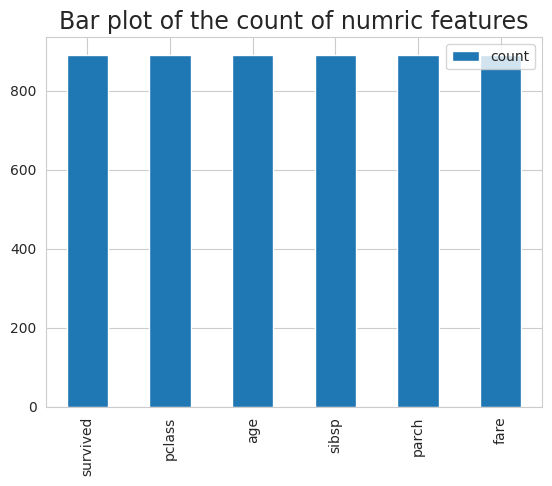

In [21]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)
d=df.describe()

dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numric features",fontsize=17)

Drop the 'Cabin'Feature and any other null value

In [23]:
# Check if the column exists before trying to drop it.
if 'cabin' in df.columns:
  df.drop('cabin',axis=1,inplace=True)

df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [25]:
# Check if the columns exist before trying to drop them.
if 'name' in df.columns and 'ticket' in df.columns:
  df.drop(['name','ticket'],axis=1,inplace=True)

df.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
